# Toplotne pumpe - COP

When2Heat set podataka se sastoji od sintetskih vremenskih nizova toplotnih potreba i koeficijenta učinka toplotnih pumpi za 16 evropskih država u periodu 2008 - 2018. na satnoj rezoluciji. Profili toplotnih potreba za grijanje prostora i PTV su izračunati na osnovu profila potrošnje gasa, temperature i brzine vjetra uz faktor populacije. Vremenski nizovi koji se tiču COP-a su proračunati za toplotne pumpe različitih toplotnih izvora: zrak, tlo, podzemna voda, te različith ponora: podno grijanje, radijatorsko grijanje i PTV. Set podataka, skripte i ulazni parametri su dostupni na Open Power System Data platform.
<br>https://open-power-system-data.org/
<br>https://github.com/oruhnau/when2heat
<br>https://www.nature.com/articles/s41597-019-0199-y.pdf
<br> Za dodatna objašnjenja vidjeti fajl Heat_demand.ipynb
<br>U nastavku je analiza podataka koji su izdvojeni za Hrvatsku, i dostupni u periodu 2008 - 2018, s obzirom na slične parametre populacije i klimatskih uslova kao u BiH. Također, za neke dalje procjene bi se mogli uključiti i rezultati potrošnje energije u domaćinstvima prema Agenciji za statistiku BiH, npr. procentualno učešće stanovništva koje se grije/hladi na struju.

Ovi podaci nisu potpuni, što znači da su za neke države dostupni npr. u periodu 2008 - 2013. i sl.Podaci su dobiveni na osnovu  podataka temperature zraka na određenim lokacijama, te temperature izvora/ponora toplote. Temperaturna zavisnost COP-a za idealne termodinamički proces je opisana sa efikasnošću Carnot-a,s tim da je realni učinak manji i jedan od načina za modeliranje COP vrijednosti je kvadratna regresija. Jedan od načina na koji se COP može modelirati je:
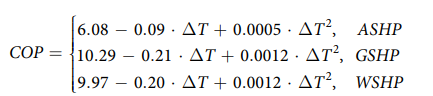

s tim da proračun ne uključuje ASHP promjenjive brzine.
Kao ulaz za krive COP-a temperaturna razlika između svih mogućih kombinacija toplotnog izvora i ponora je $\Delta{T_{h,l}}^{sink,source}$ izračunata na osnovu temperatura izvora ${T_{h,l}}^{source}$ i ponora ${T_{h,l}}^{sink}$ na lokaciji l i na satnoj osnovi kao:

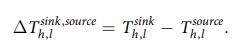

U zavisnosti od temperature izvora, razdvojeni su tipovi toplotnih pumpi. Za ASHP su korištene temperature zraka iz ERA-Interim seta, dok za GSHP uzeti su podaci proizvođača za temperaturu rasoline, dok je za transfer toplote sa tla na rasolinu oduzeto 5K od ERA Interim podataka za temperaturu tla. Za WSHP uzeta je konstantna temperatura od 10 °C i temperaturna razlika od 5K za proces razmjene toplote. Temperature toplotnih ponora su izračunate za podno, radijatorsko grijanje i grijanje vode. Za radijatorsko i podno grijanje temperaturni podaci su dobiveni iz satne temperature zraka
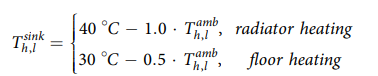

U slučaju grijanja vode, toplotni ponor konstantne temperature od 50°C je pretpostavljen u skladu sa određenim mjernim podacima iz Njmeačke.Minimalna temperaturna razlika od 15K je postavljena. COP za svaku državu je računat na osnovu COP vrijednosti na pojedinačnim lokacijama:
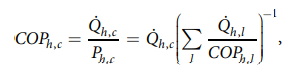
gdje su $Q_{h,l}$ i $Q_{h,c}$ prostorne i nacionalne toplotne potrebe (vremenske serije). $P_{h,c}$ označava potrošnju električne energije na toplotne pumpe. U ovom slučaju su zanemareni različiti tipovi zgrada i korištena je suma nromalizovanih vremenskih serija toplotnih potreba. COP  u slučaju podnog grijanja i radijatorskih sistema je prostrono prikupljen u odnosu na toplotne potrebe za grijanje, a COP vremenske serije za PTV su prikupljene na osnovu potreba za PTV (vremenske serije. Konstantna vrijednost faktora korekcije je primijenjen na sve vrijednosti COP-a kako bi se simulirali realni uslovi jer podaci rpoizvođača koji se koriste za regresionu krivu COP-a se dobijaju pod idealnim uslovima rada, dok se u stvarnosti uvijek javljaju gubici (npr. rad pumpe prema trenutnim potrebama, pumpanje vode za WSGP i rasoline za GSHP. Faktor korekcije je 0.85.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime

In [6]:
pd.set_option('mode.chained_assignment', None)

U fajlu when2heat su zbog bržeg pokretanja zadržani samo podaci za Hrvatsku. Fajl sadrži vrijednosti učinka toplotnih pumpi, te potreba za toplotom i grijanjem PTV. Zasad će se analizirati samo podaci koji se odnose na COP.

In [8]:
#weather data dowloadovati i spasiti u files/heat/
file=pd.read_excel(r"FILES\HEAT\when2heat.xlsx",parse_dates=True,header=[0,1,2,3])

In [9]:
file.columns

MultiIndex([('country',     'variable',     'attribute',        'unit'),
            ('country',     'variable',     'attribute',      'unit.1'),
            (     'HR',          'COP',    'ASHP_floor', 'coefficient'),
            (     'HR',          'COP', 'ASHP_radiator', 'coefficient'),
            (     'HR',          'COP',    'ASHP_water', 'coefficient'),
            (     'HR',          'COP',    'GSHP_floor', 'coefficient'),
            (     'HR',          'COP', 'GSHP_radiator', 'coefficient'),
            (     'HR',          'COP',    'GSHP_water', 'coefficient'),
            (     'HR',          'COP',    'WSHP_floor', 'coefficient'),
            (     'HR',          'COP', 'WSHP_radiator', 'coefficient'),
            (     'HR',          'COP',    'WSHP_water', 'coefficient'),
            (     'HR',  'heat_demand',         'space',          'MW'),
            (     'HR',  'heat_demand',     'space_COM',          'MW'),
            (     'HR',  'heat_demand',     'space_

<br>**HR_COP_ASHP_floor** - COP toplotne pumpe - izvor: zrak; namjena: grijanje prostora (podno grijanje)
<br>**HR_COP_ASHP_radiator** - COP toplotne pumpe - izvor: zrak; namjena: grijanje prostora (radijatori)
<br>**HR_COP_ASHP_water** - COP toplotne pumpe - izvor: zrak; namjena: grijanje vode 
	
<br>**HR_COP_GSHP_floor**  - COP toplotne pumpe - izvor: tlo; namjena: grijanje prostora (podno grijanje)
<br>**HR_COP_GSHP_radiator** - COP toplotne pumpe - izvor: tlo; namjena: grijanje prostora (radijatori)
<br>**HR_COP_GSHP_water** - COP toplotne pumpe - izvor: tlo; namjena: grijanje vode

<br>**HR_COP_WSHP_floor** - COP toplotne pumpe - izvor: podzemna voda; namjena: grijanje prostora (podno grijanje)
<br>**HR_COP_WSHP_radiator** - COP toplotne pumpe - izvor: podzemna voda; namjena: grijanje prostora (radijatori)
<br>**HR_COP_WSHP_water** -- COP toplotne pumpe - izvor: podzemna voda; namjena: grijanje vode

In [10]:
file.head(3)

country                               HR                \
               variable                              COP                 
              attribute                       ASHP_floor ASHP_radiator   
                   unit               unit.1 coefficient   coefficient   
0  2007-12-31T22:00:00Z  2007-12-31T23:00:00        2.96          2.44   
1  2007-12-31T23:00:00Z  2008-01-01T00:00:00        2.96          2.44   
2  2008-01-01T00:00:00Z  2008-01-01T01:00:00        2.96          2.44   

                                                                               \
                                                                                
   ASHP_water  GSHP_floor GSHP_radiator  GSHP_water  WSHP_floor WSHP_radiator   
  coefficient coefficient   coefficient coefficient coefficient   coefficient   
0        2.16        4.58          3.36         2.7        4.61          3.38   
1        2.16        4.58          3.36         2.7        4.61          3.38   
2        2.16        4.58          3.36         2.7        4.61          3.39   

   ...                                                                   \
   ... heat_demand                               heat_profile             
   ...       water water_COM water_MFH water_SFH    space_COM space_MFH   
   ...          MW        MW        MW        MW       MW/TWh    MW/TWh   
0  ...       121.0      62.0      41.0      18.0          289       202   
1  ...       121.0      62.0      41.0      18.0          289       202   
2  ...       142.0      79.0      43.0      21.0          296       209   

                                           
                                           
  space_SFH water_COM water_MFH water_SFH  
     MW/TWh    MW/TWh    MW/TWh    MW/TWh  
0       231        66        69        13  
1       231        66        69        13  
2       235        84        72        15  

[3 rows x 26 columns]

Format datuma se mora izmijeniti kako bi se na osnovu njega mogle dobiti posebne kolone koje će odgovarati satu, danu, mjesecu i godini.

In [11]:
d=[]
e=[]
from datetime import datetime
for value1,value2 in zip(file.iloc[:,0],file.iloc[:,1]):
    value1=value1.replace('Z', '')
    value2=value2.replace('Z', '')
    value1,value2=datetime.fromisoformat(value1),datetime.fromisoformat(value2)
    value1.strftime('%Y-%m-%d %H:%M:%S')
    value2.strftime('%Y-%m-%d %H:%M:%S')
    d.append(value1),e.append(value2)

In [12]:
file.iloc[:,0]=d
file.iloc[:,1]=e

In [13]:
file.iloc[:,0]=pd.to_datetime(file.iloc[:,0],utc=True)
file.iloc[:,1]=pd.to_datetime(file.iloc[:,1],utc=True)

In [14]:
file.head(3)

country                                    HR  \
                   variable                                   COP   
                  attribute                            ASHP_floor   
                       unit                    unit.1 coefficient   
0 2007-12-31 22:00:00+00:00 2007-12-31 23:00:00+00:00        2.96   
1 2007-12-31 23:00:00+00:00 2008-01-01 00:00:00+00:00        2.96   
2 2008-01-01 00:00:00+00:00 2008-01-01 01:00:00+00:00        2.96   

                                                                               \
                                                                                
  ASHP_radiator  ASHP_water  GSHP_floor GSHP_radiator  GSHP_water  WSHP_floor   
    coefficient coefficient coefficient   coefficient coefficient coefficient   
0          2.44        2.16        4.58          3.36         2.7        4.61   
1          2.44        2.16        4.58          3.36         2.7        4.61   
2          2.44        2.16        4.58          3.36         2.7        4.61   

                 ...                                                         \
                 ... heat_demand                               heat_profile   
  WSHP_radiator  ...       water water_COM water_MFH water_SFH    space_COM   
    coefficient  ...          MW        MW        MW        MW       MW/TWh   
0          3.38  ...       121.0      62.0      41.0      18.0          289   
1          3.38  ...       121.0      62.0      41.0      18.0          289   
2          3.39  ...       142.0      79.0      43.0      21.0          296   

                                                     
                                                     
  space_MFH space_SFH water_COM water_MFH water_SFH  
     MW/TWh    MW/TWh    MW/TWh    MW/TWh    MW/TWh  
0       202       231        66        69        13  
1       202       231        66        69        13  
2       209       235        84        72        15  

[3 rows x 26 columns]

In [15]:
file["Year"]=file.iloc[:,0].dt.year
file["Month"]=file.iloc[:,0].dt.month
file["Dayofyear"]=file.iloc[:,0].dt.dayofyear
file["Dayofmonth"]=file.iloc[:,0].dt.day
file["Hour"]=file.iloc[:,0].dt.hour

In [16]:
year=[2008,2009,2010,2011,2012,2013]
len(file.loc[file["Year"]==2008])

8784

## COP - analiza

Za očekivati je da se najveće vrijednosti COP-a postižu sa pumpama koje kao izvor koriste tlo i podzemnu vodu jer su temperature ovih izvora stabilnije od temperatura zraka tokom godine, što ima efekat i na njihovu cijenu. COP varira tokom godine zbog promjene temperaturne razlike između izvora i ponora toplote.


In [17]:
columns=[(     'HR',         'COP',    'ASHP_floor', 'coefficient'),
            (     'HR',         'COP', 'ASHP_radiator', 'coefficient'),
            (     'HR',         'COP',    'ASHP_water', 'coefficient'),
            (     'HR',         'COP',    'GSHP_floor', 'coefficient'),
            (     'HR',         'COP', 'GSHP_radiator', 'coefficient'),
            (     'HR',         'COP',    'GSHP_water', 'coefficient'),
            (     'HR',         'COP',    'WSHP_floor', 'coefficient'),
            (     'HR',         'COP', 'WSHP_radiator', 'coefficient'),
            (     'HR',         'COP',    'WSHP_water', 'coefficient')]
col_space=[(     'HR',         'COP',    'ASHP_floor', 'coefficient'),
            (     'HR',         'COP', 'ASHP_radiator', 'coefficient'),
            (     'HR',         'COP',    'GSHP_floor', 'coefficient'),
            (     'HR',         'COP', 'GSHP_radiator', 'coefficient'),
            (     'HR',         'COP',    'WSHP_floor', 'coefficient'),
            (     'HR',         'COP', 'WSHP_radiator', 'coefficient')]
col_water=[(     'HR',         'COP',    'ASHP_water', 'coefficient'),
           (     'HR',         'COP',    'GSHP_water', 'coefficient'),
           (     'HR',         'COP',    'WSHP_water', 'coefficient')]


U nastavku se može vidjeti da srednja vrijednost COP-a, kao i ekstremne vrijednosti (minimalna i maksimalna) opadaju kod pumpi koje uključuju grijanje PTV, što je posljedica grijanja na temperaturu 50°C jer time raste i temperaturna razlika koju toplotna pumpa mora premostiti.

In [18]:
file[columns].describe()

HR                                                          \
                COP                                                           
         ASHP_floor ASHP_radiator    ASHP_water    GSHP_floor GSHP_radiator   
        coefficient   coefficient   coefficient   coefficient   coefficient   
count  96434.000000  96434.000000  96434.000000  96434.000000  96434.000000   
mean       3.818571      3.617693      2.801565      5.717839      5.242918   
std        0.362879      0.554147      0.415119      0.676624      1.077515   
min        2.130000      1.660000      1.780000      3.580000      2.100000   
25%        3.630000      3.210000      2.470000      5.120000      4.280000   
50%        4.060000      3.960000      2.770000      6.040000      5.520000   
75%        4.060000      4.060000      3.100000      6.320000      6.320000   
max        4.060000      4.060000      4.040000      6.320000      6.320000   

                                                               
                                                               
         GSHP_water    WSHP_floor WSHP_radiator    WSHP_water  
        coefficient   coefficient   coefficient   coefficient  
count  96434.000000  96434.000000  96434.000000  9.643400e+04  
mean       3.099775      5.496974      4.966396  2.700000e+00  
std        0.453991      0.485201      0.896298  4.746894e-12  
min        2.400000      3.880000      2.290000  2.700000e+00  
25%        2.660000      5.110000      4.230000  2.700000e+00  
50%        3.070000      5.540000      5.020000  2.700000e+00  
75%        3.530000      5.970000      5.860000  2.700000e+00  
max        3.890000      6.090000      6.090000  2.700000e+00

In [19]:
def hourly_plot(columns_):
    file.plot(x=('country',     'variable',     'attribute',        'unit'),y=columns_,
         kind="line",figsize=(15,7))
    plt.xlabel("Godina")
    plt.ylabel("COP")
    plt.title("COP kroz sate u godini")

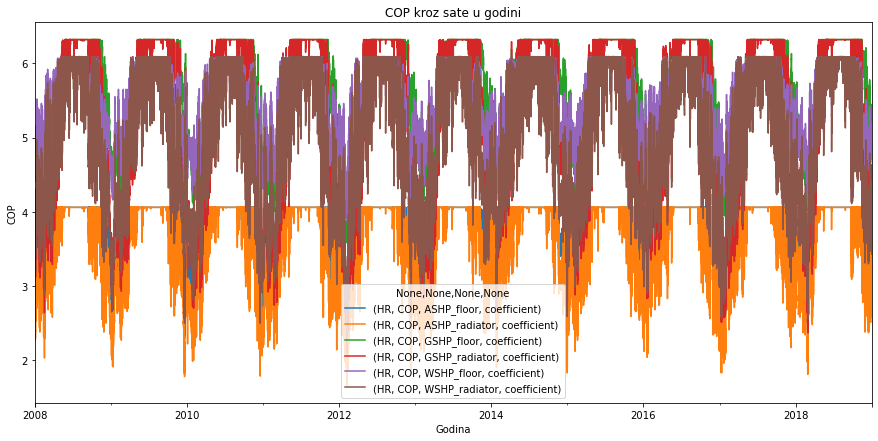

In [20]:
hourly_plot(col_space)

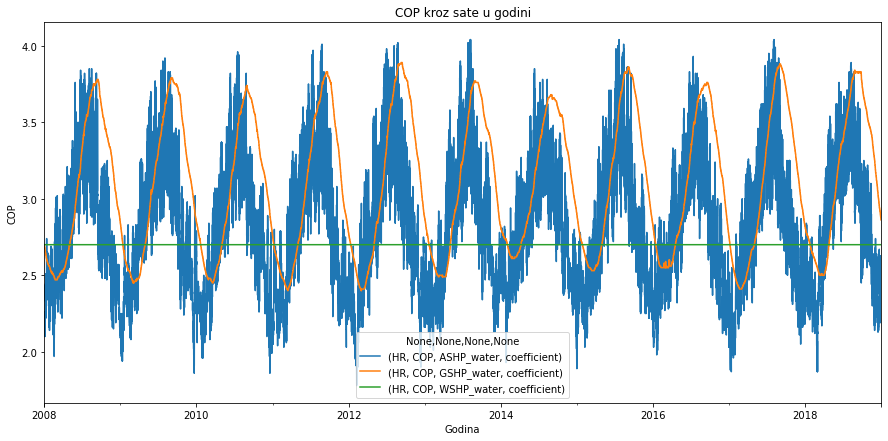

In [21]:
hourly_plot(col_water)

Naredni dijagrami pokazuju prilično razdvojive COP vrijednosti za toplotnih pumpi na zrak u poređenju sa druga dva izvora, te također i neke ekstremno niske vrijednosti koje se ne bilježe kod drugih tipova. Srednja vrijednost u slučaju podnog grijanja je nešto veća u odnosu na radijatorsko grijanje, što ima veze sa niskotemperaturnim režimom grijanja, jer je manja temperaturna razlika a veća površina za razmjenu toplote.

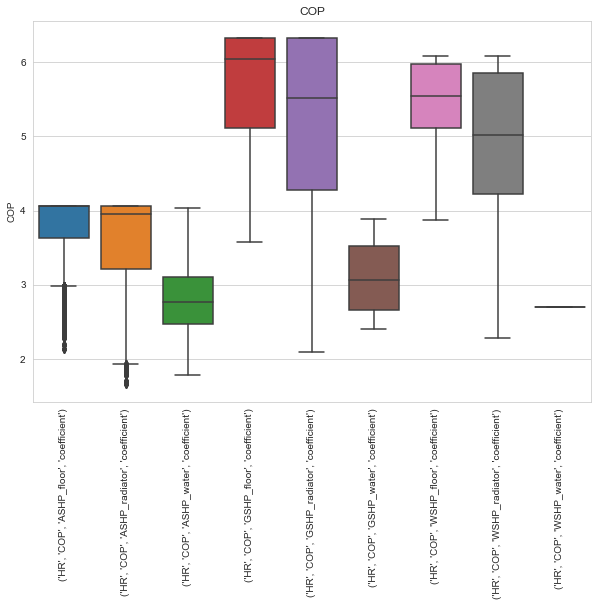

In [22]:

plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
sns.boxplot(data=(file[columns]))
plt.ylabel("COP")
plt.title("COP")
plt.xticks(rotation=90)
plt.show()

Ukoliko se izračunaju prosječne mjesečne vrijednosti COP-a tokom svih godina, očekivano se može vidjeti da se najniže vrijednosti bilježe početkom i krajem godine radi velike temperaturne razlike i niske temperature izvora, dok je u toku ljeta COP iznad 4 za sve tipove za grijanje prostora, odnosno iznad 3 za ASHP I GSHP u slučaju grijanja vode.

In [23]:
years=file["Year"].unique()[1:]
import warnings
warnings.filterwarnings('ignore')

def lineplot(columns_):
    year_month=file.groupby(["Year","Month"]).mean()
    fig, ax = plt.subplots(nrows=len(columns_), figsize=(10,20))
    for k,col in enumerate(columns_):
    
        [sns.lineplot(data=year_month.xs(year),x=np.arange(1,13),y=col, ax=ax[k],label=year) for year in years]
        ax[k].set_xlim(1,12)
        ax[k].legend()
        ax[k].set_xlabel("Mjesec")
        ax[k].set_ylabel("COP ")
        ax[k].set_title("Prosjek u mjesecu")
    plt.show()

Text(0.5, 1.0, 'COP - prosjek 2008-2018.')

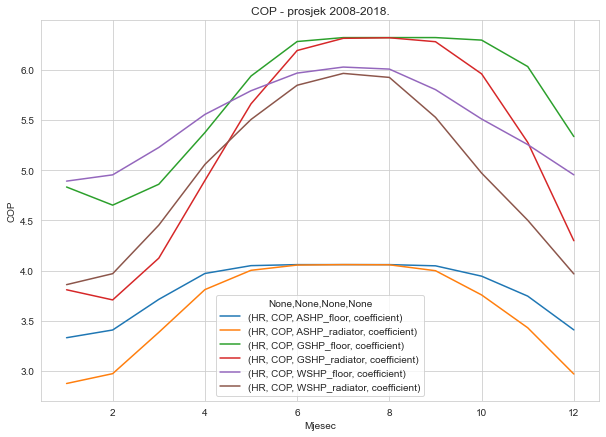

In [24]:
ax=file.groupby(["Month"]).mean()[col_space].plot.line(figsize=(10,7))
ax.set_xlabel("Mjesec")
ax.set_ylabel("COP")
ax.set_title("COP - prosjek 2008-2018.")

Text(0.5, 1.0, 'COP - prosjek 2008-2018.')

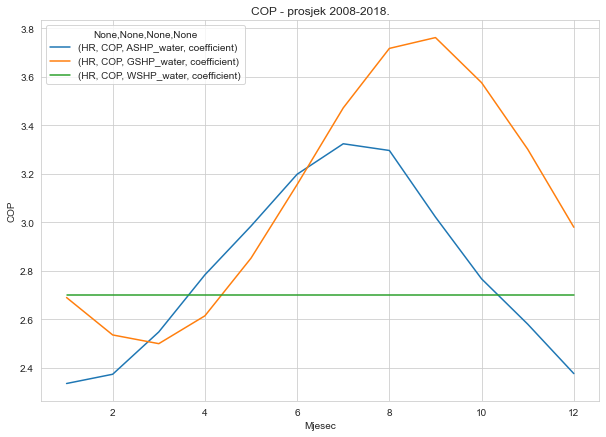

In [25]:
ax=file.groupby(["Month"]).mean()[col_water].plot.line(figsize=(10,7))
ax.set_xlabel("Mjesec")
ax.set_ylabel("COP")
ax.set_title("COP - prosjek 2008-2018.")

Iz iste baze podataka je moguće izvući temperaturu zraka, direktno i difuzno Sunčevo zračenje. Trenutna analiza će se odnositi samo na temperaturu zraka. Ovi podaci su dostupni u satnoj rezoluciji od 1980 - 2018.

In [26]:
file_weather=pd.read_csv(r"FILES\HEAT\weather_data.csv",parse_dates=True,header=0)

In [27]:
file_weather.columns[(file_weather.columns.str.contains("HR"))]

Index(['HR_temperature', 'HR_radiation_direct_horizontal',
       'HR_radiation_diffuse_horizontal'],
      dtype='object')

In [28]:
col_HR=file_weather[file_weather.columns[(file_weather.columns.str.contains("HR"))|(file_weather.columns.str.contains("utc_timestamp"))]]

In [29]:
col_HR.head(3)

,utc_timestamp,HR_temperature,HR_radiation_direct_horizontal,HR_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-0.880,0.0,0.0
1,1980-01-01T01:00:00Z,-0.888,0.0,0.0
2,1980-01-01T02:00:00Z,-0.950,0.0,0.0


Za ovaj fajl je potrebno prilagoditi format datuma kako bi se iz njega dobile korisne informacije.

In [30]:
d=[]

from datetime import datetime
for value1 in col_HR.iloc[:,0]:
    value1=value1.replace('Z', '')
    value1=datetime.fromisoformat(value1)
    value1.strftime('%Y-%m-%d %H:%M:%S')
    d.append(value1)

In [31]:
col_HR.iloc[:,0]=d

In [32]:
col_HR.iloc[:,0]=pd.to_datetime(col_HR.iloc[:,0],utc=True)

In [33]:
col_HR.head()

,utc_timestamp,HR_temperature,HR_radiation_direct_horizontal,HR_radiation_diffuse_horizontal
0,1980-01-01 00:00:00+00:00,-0.880,0.0,0.0
1,1980-01-01 01:00:00+00:00,-0.888,0.0,0.0
2,1980-01-01 02:00:00+00:00,-0.950,0.0,0.0
3,1980-01-01 03:00:00+00:00,-1.157,0.0,0.0
4,1980-01-01 04:00:00+00:00,-1.468,0.0,0.0


In [34]:
col_HR["Year"]=col_HR.iloc[:,0].dt.year
col_HR["Month"]=col_HR.iloc[:,0].dt.month
col_HR["Dayofyear"]=col_HR.iloc[:,0].dt.dayofyear
col_HR["Dayofmonth"]=col_HR.iloc[:,0].dt.day
col_HR["Hour"]=col_HR.iloc[:,0].dt.hour

In [35]:
col_HR.head(3)

,utc_timestamp,HR_temperature,HR_radiation_direct_horizontal,HR_radiation_diffuse_horizontal,Year,Month,Dayofyear,Dayofmonth,Hour
0,1980-01-01 00:00:00+00:00,-0.880,0.0,0.0,1980,1,1,1,0
1,1980-01-01 01:00:00+00:00,-0.888,0.0,0.0,1980,1,1,1,1
2,1980-01-01 02:00:00+00:00,-0.950,0.0,0.0,1980,1,1,1,2


Za temperaturu zraka će se odabrati podaci od 2008. pa nadalje jer su za te godine dostupne vrijednosti COP-a.

In [36]:
col_HR[(col_HR["Year"]>=2008)&(col_HR["Year"]<=2018)].head(3)

,utc_timestamp,HR_temperature,HR_radiation_direct_horizontal,HR_radiation_diffuse_horizontal,Year,Month,Dayofyear,Dayofmonth,Hour
245448,2008-01-01 00:00:00+00:00,-4.649,0.0,0.0,2008,1,1,1,0
245449,2008-01-01 01:00:00+00:00,-4.793,0.0,0.0,2008,1,1,1,1
245450,2008-01-01 02:00:00+00:00,-4.924,0.0,0.0,2008,1,1,1,2


Sa narednog dijagrama se može vidjeti da su prosječne temperature zraka iznad nule i i da se najveći prosječni COP ostvaruje u mjesecima gdje prosječna temperatura prelazi ili je oko 20°C u slučaju toplotnih pumpi gdje je izvor tlo i podzemna voda, odnosno iznad 5°C za one koje koriste zrak, s tim da je i njihov COP najmanji.

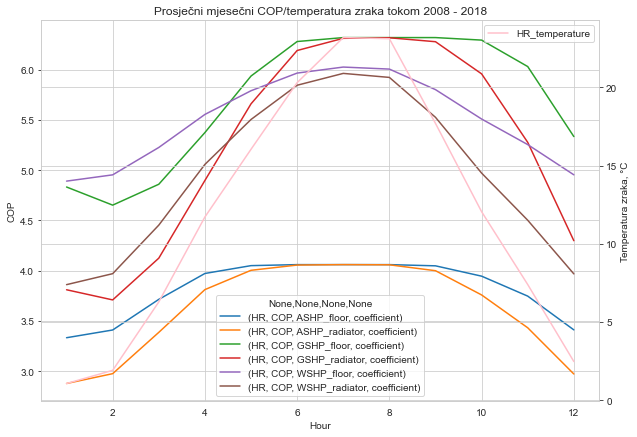

In [37]:
years=col_HR[(col_HR["Year"]>=2008)&(col_HR["Year"]<=2018)]
ax=plt.gca()
file[(file["Year"]>=2008)&(file["Year"]<=2018)].groupby("Month")[col_space].mean().plot(kind="line",ax=ax,figsize=(10,7))
ax_1=ax.twinx()

years[(years["Year"]>=2008)&(years["Year"]<=2018)].groupby("Month")["HR_temperature"].mean().plot(kind="line",ax=ax_1,color="pink")
ax.set_xlabel("Hour")
ax.set_ylabel("COP")
ax.set_title("Prosječni mjesečni COP/temperatura zraka tokom 2008 - 2018")
ax_1.set_ylabel("Temperatura zraka, °C")
ax_1.legend()
plt.show()

In [38]:
#years=col_HR[(col_HR["Year"]>=2008)&(col_HR["Year"]<=2018)]
#fig,ax=plt.subplots(nrows=len(years["Year"].unique()),figsize=(12,100))
#for k,year in enumerate(years["Year"].unique()):    
    
    #file[file["Year"]==year].plot(x=('country',     'variable',     'attribute',        'unit'),y=col_space,ax=ax[k],kind="line")
    #ax_1=ax[k].twinx()
    #years[years["Year"]==year].plot(x="utc_timestamp", y="HR_temperature",ax=ax_1,kind="line")
    #ax[k].set_xlabel("Hour")
    #ax[k].set_ylabel("COP")
  #  ax[k].set_title(year)
   # ax_1.set_ylabel("Temperature")

In [39]:
heat_0818=file[(file["Year"]>=2008)&(file["Year"]<=2018)][col_space].reset_index()
col_HR_0818=col_HR[(col_HR["Year"]>=2008)&(col_HR["Year"]<=2018)][["utc_timestamp","HR_temperature","Year"]].reset_index()
years1=pd.concat([heat_0818,col_HR_0818],axis=1)


water_0818=file[(file["Year"]>=2008)&(file["Year"]<=2018)][col_water].reset_index()
col_HR_0818=col_HR[(col_HR["Year"]>=2008)&(col_HR["Year"]<=2018)][["utc_timestamp","HR_temperature","Year"]].reset_index()
years2=pd.concat([water_0818,col_HR_0818],axis=1)

Minimalni COP je zazbilježen pri temperaturi između -7°C i -14°C.

In [40]:
for k,col in enumerate(col_space):
    print(years1[years1[col]==years1[col].min()].iloc[:,[0,k+1,9]])

       (index, , , )  (HR, COP, ASHP_floor, coefficient)  HR_temperature
36005          36007                                2.13         -14.143
36006          36008                                2.13         -13.836
36007          36009                                2.13         -12.469
36008          36010                                2.13         -10.738
36009          36011                                2.13          -9.015
36010          36012                                2.13          -7.485
       (index, , , )  (HR, COP, ASHP_radiator, coefficient)  HR_temperature
36005          36007                                   1.66         -14.143
36006          36008                                   1.66         -13.836
36007          36009                                   1.66         -12.469
36008          36010                                   1.66         -10.738
36010          36012                                   1.66          -7.485
       (index, , , )  (HR, COP, G

In [41]:
for k,col in enumerate(col_space):
   
    print(years1[years1[col]==years1[col].max()].iloc[:,[0,k+1,9,8]])

       (index, , , )  (HR, COP, ASHP_floor, coefficient)  HR_temperature  \
275              277                                4.06           9.716   
276              278                                4.06          10.056   
277              279                                4.06           9.332   
278              280                                4.06           7.707   
279              281                                4.06           6.267   
...              ...                                 ...             ...   
95316          95318                                4.06          12.635   
95317          95319                                4.06          12.397   
95318          95320                                4.06          11.339   
95319          95321                                4.06           8.459   
95320          95322                                4.06           7.130   

                  utc_timestamp  
275   2008-01-12 11:00:00+00:00  
276   2008-01-12 12

Pearsonov koeficijent korelacije između COP-a i temperature okolinskog zraka:

In [42]:
for col in col_space:
    print(col,"Temperature correlation:")
    print(years1["HR_temperature"].corr(years1[col]))

('HR', 'COP', 'ASHP_floor', 'coefficient') Temperature correlation:
0.7977841442780138
('HR', 'COP', 'ASHP_radiator', 'coefficient') Temperature correlation:
0.8556440915603144
('HR', 'COP', 'GSHP_floor', 'coefficient') Temperature correlation:
0.7867658031321241
('HR', 'COP', 'GSHP_radiator', 'coefficient') Temperature correlation:
0.8721655234938228
('HR', 'COP', 'WSHP_floor', 'coefficient') Temperature correlation:
0.9371606133107099
('HR', 'COP', 'WSHP_radiator', 'coefficient') Temperature correlation:
0.9396251156523963


In [43]:
for col in col_water:
    print(col,"Temperature correlation:")
    print(years2["HR_temperature"].corr(years2[col]))

('HR', 'COP', 'ASHP_water', 'coefficient') Temperature correlation:
0.9571584555303587
('HR', 'COP', 'GSHP_water', 'coefficient') Temperature correlation:
0.5805311510590309
('HR', 'COP', 'WSHP_water', 'coefficient') Temperature correlation:
1.5472458153186897e-16


In [44]:
#years=col_HR[(col_HR["Year"]>=2008)&(col_HR["Year"]<=2018)]
#fig,ax=plt.subplots(nrows=len(years["Year"].unique()),figsize=(12,100))
#for k,year in enumerate(years["Year"].unique()):             
   # file[file["Year"]==year].plot(x=('country',     'variable',     'attribute',        'unit'),y=col_water,ax=ax[k],kind="line")
   # ax_1=ax[k].twinx()
    #years[years["Year"]==year].plot(x="utc_timestamp", y="HR_temperature",ax=ax_1,kind="line")
   # ax[k].set_xlabel("Hour")
   # ax[k].set_ylabel("COP")
   # ax[k].set_title(year)
 #   ax_1.set_ylabel("Temperature")

# Kotlovi i toplotne pumpe u BiH

Podaci o tehnologijama toplotnih pumpi i kotlova, proizvođačima, stepenu efikasnosti i kapacitetima preuzeti su sa portala https://ebrdgeff.com/ba/bs/ kao indikator opreme koja se koristi na tržištu. Ovi podaci su spašeni u dva .xlsx fajla: "Heat_pumps_final" i "Boilers". Sa web stranice je moguće unijeti i druge vrste opreme, ali se trenutno istraživanje svelo na ova dva tipa.  Toplotne pumpe se u ovom slučaju mogu razmatrati za niskotemperaturne režime grijanja u dobro-izoliranim objektima. Toplotne pumpe zrak-voda mogu preuzimati toplotu od zraka kada njegova temperatura ide i do temperatura ispod -20°C.

In [4]:
cols=['Unnamed: 0','MANUFACTURER', 'Product Id','PRODUCT TYPE',"Unnamed: 4","Unnamed: 5",'Coefficient of Performance','Heating capacity [kW]','Cooling capacity [kW]', 'Seasonal Coefficient of Performance']

file=pd.read_excel(r"FILES\HEAT\Heat_pumps_final.xlsx",usecols="A:J",names=cols)

In [5]:
file.columns[0]

'Unnamed: 0'

Najprije će se učitati fajl koji se odnosi na toplotne pumpe. Kolona "Unnamed: 4" sadrži komentare. Ukupno je dostupno 1211 modela. Za sve modele je dat COP, a za 523/1211 dostupan i sezonski učinak - SCOP. Vrijednosti COP-a se kreću između 4.25 i 7.1 sa srednjom vrijedošću 4.79, dok SCOP za neke modele je označen sa 0, radi čega se to prikazuje kao minimalna vrijednost i na takav način umanjuju srednju vrijednost. Maksimalna vrijednost SCOP je 8. 75% podataka ima snagu grijanja do 142 kW, odnosno snagu hlađenja do 150 kW.

Sumarna statistika za numeričke kolone je data u idućoj tabeli. Podaci za grijanje se moraju prebaciti iz tekstualnog u numerički format te se nakon toga prikaz sumarne statistike ponavlja.

In [6]:
file.describe()

,Unnamed: 0,Product Id,Coefficient of Performance,Cooling capacity [kW],Seasonal Coefficient of Performance
count,1211.000000,1211.000000,1211.000000,981.000000,523.000000
mean,605.000000,12726.477291,4.788208,124.167965,4.143523
std,349.729896,11237.886776,0.540084,210.946325,1.222741
min,0.000000,613.000000,4.250000,0.000000,0.000000
25%,302.500000,3072.500000,4.400000,8.000000,3.950000
50%,605.000000,10358.000000,4.600000,15.000000,4.340000
75%,907.500000,26279.500000,5.000000,150.000000,4.745000
max,1210.000000,33069.000000,7.060000,982.000000,8.000000


In [7]:
numcols=['Heating capacity [kW]']
       #'Seasonal Coefficient of Performance']
for col in numcols:
    file[col]=file[col].str.replace(",","")
    file[col]=pd.to_numeric(file[col])

In [8]:
file.describe()

,Unnamed: 0,Product Id,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
count,1211.000000,1211.000000,1211.000000,1211.000000,981.000000,523.000000
mean,605.000000,12726.477291,4.788208,155.649075,124.167965,4.143523
std,349.729896,11237.886776,0.540084,306.269078,210.946325,1.222741
min,0.000000,613.000000,4.250000,2.700000,0.000000,0.000000
25%,302.500000,3072.500000,4.400000,9.050000,8.000000,3.950000
50%,605.000000,10358.000000,4.600000,15.100000,15.000000,4.340000
75%,907.500000,26279.500000,5.000000,142.000000,150.000000,4.745000
max,1210.000000,33069.000000,7.060000,1866.000000,982.000000,8.000000


Izgled prva četiri reda je dat u sljedećem prikazu.Kolona "Unnamed:5" će se izbaciti jer je ona višak.

In [9]:
file=file.drop(["Unnamed: 5","Unnamed: 0"],axis=1)

In [10]:
file.head(2)

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
0,CIAT,32570,CIAT EREBA HE 15H,reversible heat pump equipped with DC inverter...,4.25,15.1,13.0,4.41
1,HITACHI,28846,HITACHI YUTAKI S 10,Heat pump SPLIT TYPE air to water,4.29,32.0,21.0,3.60


Iz informacija pruženih u koloni "Unnamed: 4" može se vidjeti da se na tržištu nude toplotne pumpe MONOBLOCK i SPLIT načina konfiguracije. MONOBLOCK toplotne pumpe se nalaze izvan objekta (kompresor i izmjenjivač toplote i vodena strana), odakle se topla voda ili mješavina vode i antifriza, nakon zagrijavanja, šalje prema objektu koji se grije. Ovakav tip toplotnih pumpi je jeftiniji i lakši za instalaciju. Nedostatak je priprema tople vode van objekta, što znači da veći utrošeni rad pumpe tokom zime s obzirom da može doći do hlađenja vode prije nego što dospije u grijani objekat.

Kod SPLIT jedinica toplota zraka se predaje gasnom mediju koji kao takav ulazi u objekat u unutrašnju jedinicu gdje predaje toplotu vodi koja se koristi za grijanje prostora i pripremu PTV. Kompresor i refrižerant se nalaze u vanjskoj jedinici, dok se IT, ekspanziona posuda i vodena strana ( i eventualno električni grijaći element) nalaze u unutrašnjoj. Kako se voda zagrijava u unutrašnjosti objekta, tako se smatra da se kod SPLIT sistema utroši manji rad. Također, vanjska jedinica može biti udaljena i do 50 m od objekta sa malim toplotnim gubicima.


Među modelima se nalazi i toplotna pumpa sa inverterom, što ima veze sa efikasnošću rada toplotne pumpe i frekvencijom rada kompresora. Toplotnim pumpama sa inverterom se prednost daje u vidu veće sveukupne energetske efikasnosti na godišnjem nivou, dužeg životnog vijeka toplotne pumpe i komfora. Razlika između toplotne pumpe sa fiksnim izlazom i sa inverterskom tehnolgijom leži u načinu dobavljanja energije u skladu sa termalnim zahtjevima objekta. Toplotna pumpa sa fiksnim izlazom radi kontinuirano na 100% kapaciteta kako bi ispunila potrebe za toplotom objekta. Takav rad se nastavlja sve dok se ne postigne željena temperatura, nakon čega se smjenjuu ciklusi paljenja  i gašenja u procesu održavanja zahtijevane temperature. Toplotna pumpa sa inverterom koristi kompresor promjenjive snage koji modifikuje izlaznu energiju na način da odgovara potrebama za toplotom uzimajući u obzir promjenu temperature zraka. Kada su potrebe za toplotom male, toplotna pumpa smanjuje izlaznu energiju, ograničava potrošnju električne energije i broj start - stop ciklusa, te stabilnije snabdijevanje električnom energijom. Npr. ukoliko potrebe za grijanjem iznose 15 kW na projektnoj minimalnoj temperaturi od -3°C, toplotna pumpa sa fiksnim izlazom će na izlazu imati 15 kW neovisno o vanjskoj temperaturi. Ovo se smatra neefikasnim jer će potrebe na temperaturi od 2°C iznositi manje, npr. 10 KW. Jedinica sa inverterom pruža izlaz u opsegu od (30-100)% maksimalnog kapaciteta. To znači da ako potrebe iznose 15 kW, instalirat će se toplotna pumpa inverterskog tipa u opsegu (5-15)kW, što znači da će pri najmanjim potrebama za grijanjem toplotma pumpa raditi kapacitetom od 5 KW, a ne sa 15 KW kao što je u slučaju fiksnog izlaza. 

Toplotna pumpa sa inverterom radi na način da fluktuacije temperature drži na minimumu, dok toplotna pumpa sa fiksnim izlazom vrši cikluse između maksimalnog kapaciteta i nule, te se do željene temperature dolazi nakon većeg broja ovih ciklusa. Također, tu je i ušteda prostora, s obzirom da se kod toplotnim pumpi sa stalnim izlazom instalira i rezervoar koji ima svru i predgrijavanja vode za slučaj više prostroija koje se ne griju na istoj temperaturi. 


SCOP nije prikazan ili je dat kao nulta vrijednost za pojedine toplotne pumpe (ukupno 32).

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [53]:
len(file[file["Seasonal Coefficient of Performance"]==0])

32

In [54]:
file[(file["Seasonal Coefficient of Performance"]==0)|(file["Seasonal Coefficient of Performance"]==np.NaN)] #

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
16,SIRAC,10508,SIRAC LSQ25R,Sirac low-temperature integrated heat pump,4.30,75.0,0.0,0.0
17,SIRAC,10507,SIRAC LSQ20R,Sirac low-temperature integrated heat pump,4.30,65.0,0.0,0.0
18,SIRAC,10506,SIRAC LSQ15R,Sirac low-temperature integrated heat pump,4.30,39.0,0.0,0.0
19,SIRAC,10505,SIRAC LSQ10R,Sirac low-temperature integrated heat pump,4.30,32.0,0.0,0.0
20,SIRAC,10504,SIRAC LSQ06RC,Sirac low-temperature integrated heat pump,4.30,18.0,0.0,0.0
21,SIRAC,10503,SIRAC LSQ05RC,Sirac low-temperature integrated heat pump,4.30,16.5,0.0,0.0
22,SIRAC,10502,SIRAC LSQ04RC,Sirac low-temperature integrated heat pump,4.30,11.9,0.0,0.0
23,SIRAC,10501,SIRAC LSQ03RC,Sirac low-temperature integrated heat pump,4.30,10.3,0.0,0.0
33,RUIDONG,10486,RUIDONG RLSFW010R,Ruidong Mini type air cooled heat pump,4.30,10.3,10.0,0.0
39,KELING,10468,KELING FM-180R,Keling Screw compressor Air-water,4.30,188.0,170.0,0.0


Najveći broj toplotnih pumpi ima kapacitet grijanja do 200 kW, dim da kod pojedinih kapacitet grijanja ide do 1400 kW.Najveći broj posmatranih toplotnih pumpi ima kapacitet hlađenja do 100 kW,manji broj do 200 kW, uz velika postrojenja do 900 kW.

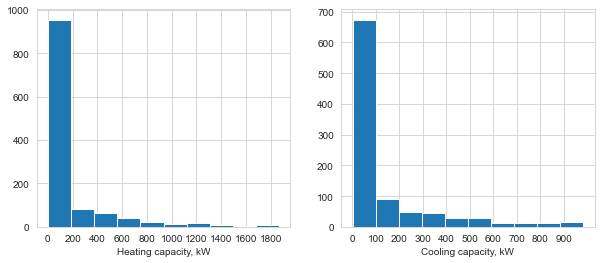

In [55]:
fig, ax=plt.subplots(ncols=2, figsize=(10,4))


file["Heating capacity [kW]"].hist(ax=ax[0])
ax[0].set_xticks(np.arange(0,2000,200))
ax[0].set_xlabel("Heating capacity, kW")

file[file["Cooling capacity [kW]"]!=0]["Cooling capacity [kW]"].hist(ax=ax[1])
ax[1].set_xticks(np.arange(0,1000,100))
ax[1].set_xlabel("Cooling capacity, kW")


plt.show()

Gledajući koeficijent učinka, on se za najveći broj modela kreće u vrijednostima od 4.2 do 4.8. Najveći broj toplotnih pumpi za koje su dostupni podaci imaju SCOP između 3.5 i 5.5. Ekstremne vrijednosti nastaju nakon (300-350) kW za oba moda. 

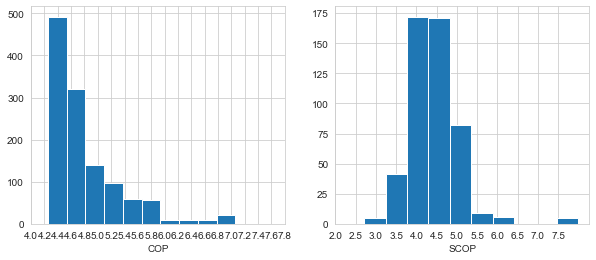

In [56]:
fig, ax=plt.subplots(ncols=2, figsize=(10,4))


file["Coefficient of Performance"].hist(ax=ax[0])
ax[0].set_xticks(np.arange(4,8,0.2))
ax[0].set_xlabel("COP")


file[file["Seasonal Coefficient of Performance"]!=0]["Seasonal Coefficient of Performance"].hist(ax=ax[1])
ax[1].set_xticks(np.arange(2,8,0.5))
ax[1].set_xlabel("SCOP")
plt.show()


Text(0.5, 1.0, 'COP')

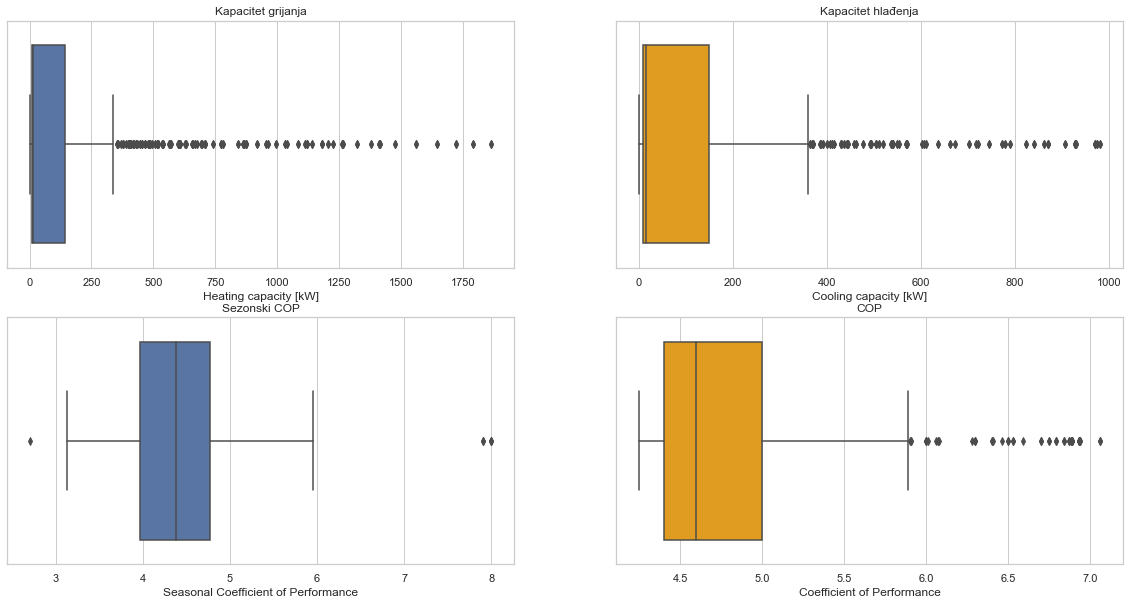

In [57]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(nrows=2,ncols=2, figsize=(20,10))

sns.boxplot(x=file["Heating capacity [kW]"],ax=ax[0,0])
ax[0,0].set_title("Kapacitet grijanja")

ax[0,1] = sns.boxplot(x=file["Cooling capacity [kW]"],ax=ax[0,1],color="orange")
ax[0,1].set_title("Kapacitet hlađenja")


sns.boxplot(x=file[file["Seasonal Coefficient of Performance"]!=0]["Seasonal Coefficient of Performance"],ax=ax[1,0])
ax[1,0].set_title("Sezonski COP")

ax[1,1] = sns.boxplot(x=file["Coefficient of Performance"],ax=ax[1,1],color="orange")
ax[1,1].set_title("COP")


Maksimalni SCOP u vrijednosti od 8  je zabilježen kod proizvođača HOVAL toplotnih pumpi za grijanje i hlađenje objekata kapaciteta grijanja (8.60 - 15.24)kW sa integrisanim rezervoarom i varijabilnim izlazom u toku godine.

In [58]:
file[file["Seasonal Coefficient of Performance"]==file["Seasonal Coefficient of Performance"].max()]

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
1176,HOVAL,29650,HOVAL ULTRASOURCE T COMPACT (13/200),Modulating heat pump system for heating and cooling in the living area.,6.30,8.60,NaN,8.0
1177,HOVAL,29649,HOVAL ULTRASOURCE T COMFORT (13),Modulating heat pump system for heating and cooling in the living area.,6.30,8.60,NaN,8.0
1181,HOVAL,29651,HOVAL ULTRASOURCE T COMFORT (17),Modulating heat pump system for heating and cooling in the living area.,6.46,15.24,NaN,8.0


Minimalni SCOP je zabilježen kod proizvođača FUJITSU za split sistem sa toplotnim učinkom od 8 kW i iznosi 2.71. Pritom COP iznosi 4.5 što je značajno veće.

In [59]:
file[file["Seasonal Coefficient of Performance"]==file[file["Seasonal Coefficient of Performance"]!=0]["Seasonal Coefficient of Performance"].min()]

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
422,FUJITSU,30820,WATERSTAGE HP DUO 14,Split Type High Power Series WGYG140DG6 / WOYG140LCTA WATERSTAGE AIR-TO-WATER system is an economical and clean water heating system that uses heat pump technology,4.5,8.0,NaN,2.71


Kada je riječ o radnim medijima, posmatrat  će se oni čiji je SCOP različit od nule. Za neke toplotne pumpe se mogu vidjeti radni mediji, te će se izvršiti selekcija na one koji rade kao zrak - voda (146) i tlo - voda (8), te djelimična selekcija na one zrak - zrak (20).

In [60]:
file_scop=file[file["Seasonal Coefficient of Performance"]>0]

file_air=file_scop[file_scop["Unnamed: 4"].str.contains("zrak|air",case=False)]

zrak - voda:

In [61]:
file_air_water=file_air[file_air["Unnamed: 4"].str.contains("water|voda|brine",case=False)]


In [62]:
print("Zrak - voda,  broj:",len(file_air_water))
file_air_water.head(2)


Zrak - voda,  broj: 146


,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
1,HITACHI,28846,HITACHI YUTAKI S 10,Heat pump SPLIT TYPE air to water,4.29,32.0,21.0,3.60
3,FUJITSU,30818,WATERSTAGE HP 11T,Split Type High Power Series WSYK160DG9 / WOYK112LCTA WATERSTAGE AIR-TO-WATER system is an economical and clean water heating system that uses heat pump technology,4.30,11.0,NaN,3.17


zrak - zrak 

In [63]:
file_air_air=file_air[file_air["Product Id"].isin(file_air_water["Product Id"]) ==False]

In [64]:
print("Zrak-zrak broj:",len(file_air_air))

Zrak-zrak broj: 20


zemlja - voda

In [65]:
file_ground_water=file_scop[file_scop["Unnamed: 4"].str.contains("zemlja|earth",case=False)]

In [66]:
print("Tlo - voda broj:",len(file_ground_water))
file_ground_water.head(3)

Tlo - voda broj: 8


,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
552,CTC,32186,"CTC ECOPART 425 PRO, 400 V 3N",CTC toplotna pumpa zemlja/voda ili voda/voda,4.58,24.0,NaN,4.80
553,CTC,32185,"CTC ECOPART 425, 400 V 3N",CTC toplotna pumpa zemlja/voda ili voda/voda,4.58,24.0,NaN,4.80
891,CTC,32183,"CTC ECOPART 414, 400 V 3N",CTC toplotna pumpa zemlja/voda ili voda/voda,4.95,14.0,NaN,4.95


In [67]:
file_air_water.loc[:,"Medij"]="Z-V"
file_ground_water.loc[:,"Medij"]="T-V"
file_air_air.loc[:,"Medij"]="Z-Z"

Nakon što se izvršila klasifikacija po radnim medijima, pojedinačni setovi će se opet spojiti u jedan veliki.

In [68]:
file_tot=pd.concat([file_air_water,file_ground_water,file_air_air],axis=0)

In [69]:
file_tot.head(2)

,MANUFACTURER,Product Id,PRODUCT TYPE,Unnamed: 4,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance,Medij
1,HITACHI,28846,HITACHI YUTAKI S 10,Heat pump SPLIT TYPE air to water,4.29,32.0,21.0,3.60,Z-V
3,FUJITSU,30818,WATERSTAGE HP 11T,Split Type High Power Series WSYK160DG9 / WOYK112LCTA WATERSTAGE AIR-TO-WATER system is an economical and clean water heating system that uses heat pump technology,4.30,11.0,NaN,3.17,Z-V


Očekivani, najveći SCOP imaju toplotne pumpe tlo - voda radi stabilnije temperature tla tokom godine.

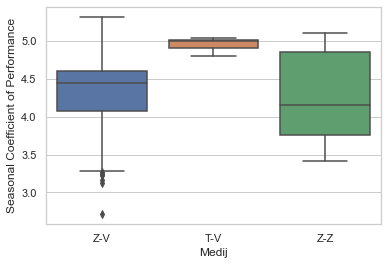

In [70]:
x = sns.boxplot(x="Medij", y="Seasonal Coefficient of Performance",
                 data=file_tot)

Toplotne pumpe tlo - voda su uglavnom primjetne kod kapaciteta grijanja do 30 KW, dok veće kapacitete pokrivaju uglvnom pumpe zrak - voda. 

<AxesSubplot:xlabel='Cooling capacity [kW]', ylabel='Seasonal Coefficient of Performance'>

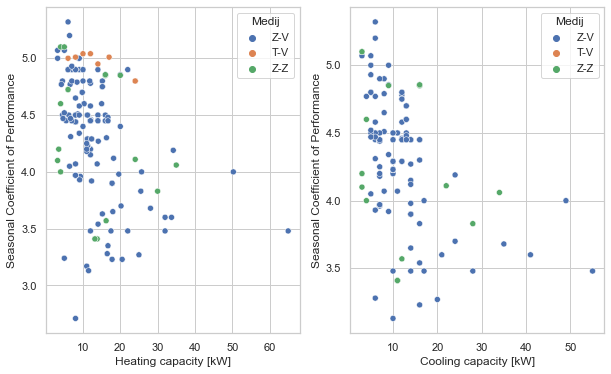

In [71]:
fig, ax=plt.subplots(ncols=2, figsize=(10,6))

sns.scatterplot(
    data=file_tot,
    x="Heating capacity [kW]", y="Seasonal Coefficient of Performance",
    hue="Medij",ax=ax[0])


sns.scatterplot(
    data=file_tot,
    x="Cooling capacity [kW]", y="Seasonal Coefficient of Performance",
    hue="Medij",ax=ax[1])

In [18]:
file[file["Cooling capacity [kW]"]<=4].describe() # za COP kod AC uređaja u cooling demand - EnergyPLAN

,Product Id,Coefficient of Performance,Heating capacity [kW],Cooling capacity [kW],Seasonal Coefficient of Performance
count,115.000000,115.000000,115.000000,115.000000,27.000000
mean,18124.886957,5.028522,343.411913,2.458904,3.244815
std,11729.259255,0.634815,629.167246,1.354410,2.166551
min,626.000000,4.300000,2.700000,0.000000,0.000000
25%,10290.000000,4.430000,3.600000,1.212000,0.000000
50%,27755.000000,5.000000,4.530000,3.000000,4.390000
75%,27792.500000,5.360000,70.000000,4.000000,4.665000
max,32896.000000,6.940000,1866.000000,4.000000,5.200000


# Kotlovi - analiza

Za analizu tržišta kotlova uzeta su 524 kotla iz baze od različitih proizvođača.

In [72]:
file_boiler=pd.read_excel(r"FILES\HEAT\BoilerS.xlsx",header=0)

In [73]:
file_boiler.shape
file_boiler.head(3)

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
0,0,CENTROMETAL,1849,CENTROMETAL CENTROPELET Z 6,"Centrometal wood pellet stove, 5.5kW, type Centrometal CentroPelet Z 6",90,STANDARD,5.50,Heat,BIOMASS,NaN,NaN,NaN
1,1,THERMOFLUX,31184,PELLET STOVE ADELE 6,Pellet stoves,90,ATMOSPHERIC,6.00,Heat,NaN,A++,NaN,NaN
2,2,ALFA-PLAM,32930,ALFA 90 PELET,Pellet stove,86,ATMOSPHERIC,8.00,Heat,NaN,A+,NaN,NaN


Kotlovi iz baze koriste biomasu i gas. Za pojedine kotlove kolona koja označava gorivo je prazna, te, ukoliko se u opisu nalazi pelet, tom kotlu će se kao gorivo dodati oznaka biomas2. Inače, u nekim slučajevima se koristi i drvna sječka. Ove dvije vrste goriva će se spojiti u jednu koja će se odnositi na biomasu.

In [74]:
file_boiler.loc[file_boiler["Unnamed: 11"].str.contains("pellet",case=False,na=False),"Fuel"]="BIOMASS"
file_boiler.loc[file_boiler["Fuel"]=="BIOMASS (PELLETS)","Fuel"]="BIOMASS"

file_boiler.loc[file_boiler["Type"].str.contains("pellet",case=False,na=False),"Fuel"]="BIOMASS"
file_boiler.loc[file_boiler["PRODUCT TYPE"].str.contains("pellet",case=False,na=False),"Fuel"]="BIOMASS"
file_boiler.loc[file_boiler["Unnamed: 11"].str.contains("combined|wood",case=False,na=False),"Fuel"]="BIOMASS"

In [75]:
#drvna sječka #prva 3 reda
file_boiler[file_boiler["Unnamed: 11"].str.contains("wood chip",case=False,na=False)].head(3)

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
392,392,CENTROMETAL,1856,CENTROMETAL EKO-CKS MULTI PLUS 170,NaN,91,STANDARD,170.00,Heat,BIOMASS,A+,"Centrometal wood chip boiler, 170kW, type Centrometal EKO-CKS Multi Plus 170",NaN
405,405,CENTROMETAL,1857,CENTROMETAL EKO-CKS MULTI PLUS 250,NaN,91,STANDARD,250.00,Heat,BIOMASS,A+,"Centrometal wood chip boiler, 250kW, type Centrometal EKO-CKS Multi Plus 250",NaN
415,415,CENTROMETAL,1858,CENTROMETAL EKO-CKS MULTI PLUS 340,NaN,92,STANDARD,340.00,Heat,BIOMASS,A+,"Centrometal wood chip boiler, 340kW, type Centrometal EKO-CKS Multi Plus 340",NaN


U navedenom setu 61% kotlova kao gorivo koristi biomasu, a 39% gas.

<AxesSubplot:ylabel='Fuel'>

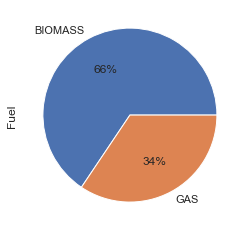

In [76]:
file_boiler.groupby(["Fuel"])["Fuel"].count().plot(kind='pie', autopct='%1.0f%%',)

In [77]:
file_boiler["Capacity [kW]"]=file_boiler["Capacity [kW]"].str.replace(",","")

In [78]:
file_boiler["Capacity [kW]"]=pd.to_numeric(file_boiler["Capacity [kW]"])

Minimalna efikasnost kotla je 85%, a maksimalna 11% uz srednju vrijednost od 95% uz značajnu standardnu devijaciju. Minimalna snaga kotla je 5.5 kW,a maksimalna 12 000 kW. 75% kotlova je ispod 100 kW.

In [79]:
file_boiler.describe()

,Unnamed: 0,Product Id,Thermal Efficiency [%],Capacity [kW],Boiler
count,524.000000,524.000000,524.000000,524.000000,0.0
mean,261.500000,16884.585878,94.975191,382.425382,NaN
std,151.410039,11779.816617,7.110259,1285.995851,NaN
min,0.000000,357.000000,85.000000,5.500000,NaN
25%,130.750000,3020.750000,90.000000,21.425000,NaN
50%,261.500000,18390.500000,92.000000,30.000000,NaN
75%,392.250000,29152.250000,97.000000,100.000000,NaN
max,523.000000,33071.000000,111.000000,12000.000000,NaN


Pojedini kotlovi se sastoje iz dva dijela - sistema za gasifikaciju drveta i dijela za sagorijevanje peleta,čime se omogućava veći izbor goriva za korištenje-kombinacija ili individualno, uz povećanje efikasnosti.

In [80]:
print("Ukupno gasifikacija drveta + pelet:",file_boiler.shape[0])
file_boiler[file_boiler["Unnamed: 11"].str.contains("combined",case=False,na=False)].head(2)

Ukupno gasifikacija drveta + pelet: 524


,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
130,130,RIELLO/BERETTA S.P.A,31071,MYNUTE BERETTA 20 C.S.I.,NaN,91,ATMOSPHERIC,21.2,Heat,BIOMASS,A+,Combined flow wall boiler with closed chamber and forced discharge of combustion products facade - methaneIt consists of 4 versions,NaN
144,144,RIELLO/BERETTA S.P.A,31072,MYNUTE BERETTA 24 C.S.I.,NaN,91,ATMOSPHERIC,24.0,Heat,BIOMASS,A+,Combined flow wall boiler with closed chamber and forced discharge of combustion products facade - methaneIt consists of 4 versions,NaN


Gledajući vrstu goriva, kotlovi na gas (kondenzacijski kotlovi) očekivano imaju veći stepen efikasnosti radi hlađenja dimnih gasova do temperature na kojoj se dešava kondenzacija vodene pare.Međutim kotlovi na gas imaju i veću standardnu devijaciju, te će se obratiti pažnja koja vrsta kotlova je u pitanju.

In [81]:
print("Srednja vrijednost")
print(file_boiler.groupby("Fuel")["Thermal Efficiency [%]"].mean())
print("Standardna devijacija")
print(file_boiler.groupby("Fuel")["Thermal Efficiency [%]"].std(ddof=0))

Srednja vrijednost
Fuel
BIOMASS    91.042904 
GAS        101.836478
Name: Thermal Efficiency [%], dtype: float64
Standardna devijacija
Fuel
BIOMASS    2.410403
GAS        7.169006
Name: Thermal Efficiency [%], dtype: float64


Text(0.5, 0, 'Thermal efficiency, %')

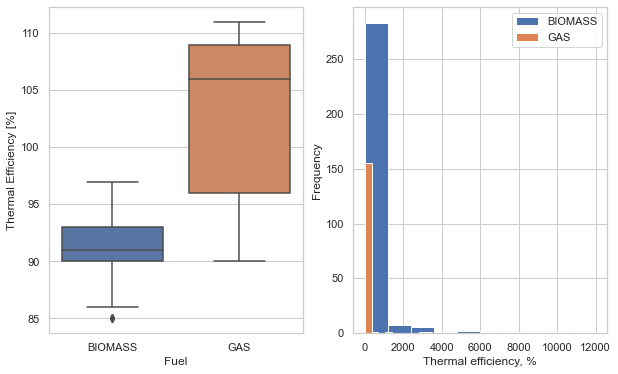

In [82]:
fig, ax=plt.subplots(ncols=2, figsize=(10,6))
x = sns.boxplot(x="Fuel", y="Thermal Efficiency [%]",
                 data=file_boiler,ax=ax[0])

file_boiler.groupby("Fuel")["Capacity [kW]"].plot(kind="hist",ax=ax[1])
ax[1].legend()
ax[1].set_xlabel("Thermal efficiency, %")

Efikasnost kotlova na biomasu bez obzira na snagu je u rangu između cca.a 85% i 95%, dok se za gas efikasnost grupiše oko vrijednosti od 95%, te u drugom dijeli između 105% i 110%.

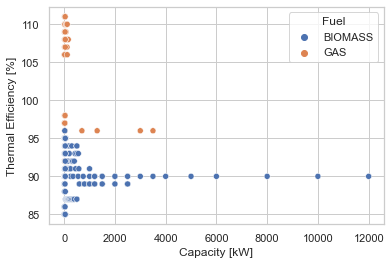

In [83]:
x = sns.scatterplot(x="Capacity [kW]", y="Thermal Efficiency [%]",hue="Fuel",
                 data=file_boiler)

Većina kotlova na biomasu je snage do 1000 kW, a većina kotlova na gas je snage do 300 kW.

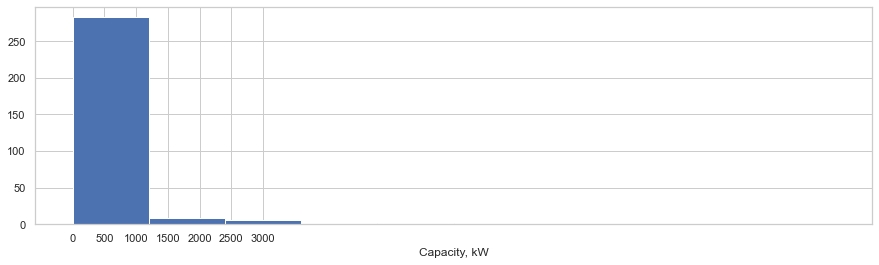

In [84]:
file_boiler[file_boiler["Fuel"]=="BIOMASS"]["Capacity [kW]"].hist(figsize=(15,4))
plt.xticks(np.arange(0,3500,500))
plt.xlabel("Capacity, kW")
plt.show()


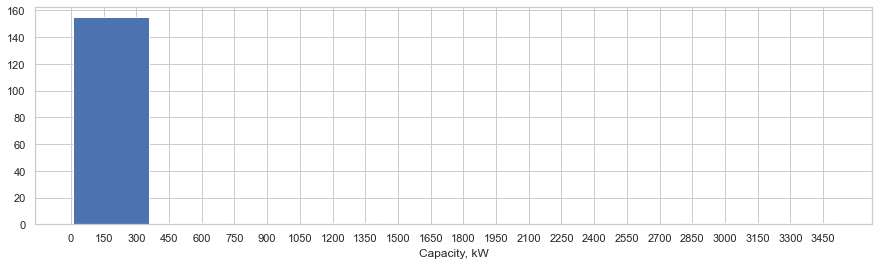

In [85]:
file_boiler[file_boiler["Fuel"]=="GAS"]["Capacity [kW]"].hist(figsize=(15,4))
plt.xticks(np.arange(0,3500,150))
plt.xlabel("Capacity, kW")
plt.show()

In [86]:
file_boiler[file_boiler["Capacity [kW]"]==file_boiler["Capacity [kW]"].max()]

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
497,497,TOPLING,14499,KPR 12000,NaN,90,ATMOSPHERIC,12000.0,Heat,BIOMASS,A,System for automatic combustion of the biomass,NaN
498,498,TOPLING,414,KPR 12000,NaN,90,NaN,12000.0,Heat,NaN,A+,System for automatic combustion of the biomass,NaN


In [87]:
file_boiler[file_boiler["Capacity [kW]"]==file_boiler["Capacity [kW]"].min()]

,Unnamed: 0,MANUFACTURER,Product Id,PRODUCT TYPE,Type,Thermal Efficiency [%],Combustion technology,Capacity [kW],Output,Fuel,Efficiency label,Unnamed: 11,Boiler
0,0,CENTROMETAL,1849,CENTROMETAL CENTROPELET Z 6,"Centrometal wood pellet stove, 5.5kW, type Centrometal CentroPelet Z 6",90,STANDARD,5.5,Heat,BIOMASS,NaN,NaN,NaN


Što se tiče tehnologije sagorijevanja, dato je nekoliko grupa:

In [88]:
file_boiler["Combustion technology"].unique()

array(['STANDARD', 'ATMOSPHERIC', 'CONDENSING', 'LOW TEMPERATURE', nan],
      dtype=object)

<AxesSubplot:ylabel='Combustion technology'>

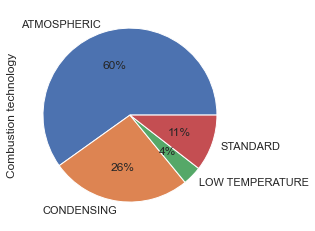

In [89]:
file_boiler.groupby(["Combustion technology"])["Combustion technology"].count().plot(kind='pie', autopct='%1.0f%%',)

In [90]:
file_boiler.groupby("Combustion technology")["Thermal Efficiency [%]"].mean()

Combustion technology
ATMOSPHERIC        93.371930 
CONDENSING         102.629032
LOW TEMPERATURE    93.411765 
STANDARD           91.060000 
Name: Thermal Efficiency [%], dtype: float64

Korelacija između kapaciteta i efikasnosti je negativna, ali i mala,što ne ukazuje na značajan linearni odnos između ove dvije varijable.

In [91]:
file_boiler["Capacity [kW]"].corr(file_boiler["Thermal Efficiency [%]"])

-0.17478606909036334

<AxesSubplot:xlabel='Capacity [kW]', ylabel='Thermal Efficiency [%]'>

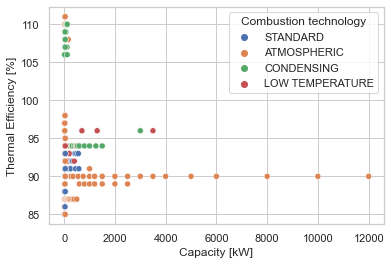

In [92]:
sns.scatterplot(
    data=file_boiler,
    x="Capacity [kW]", y="Thermal Efficiency [%]",
    hue="Combustion technology")